Dataset from: https://www.kaggle.com/datasets/prashant268/chest-xray-covid19-pneumonia

In [20]:
import numpy
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16, ResNet50

In [38]:
train_generator = data_generator.flow_from_directory(
    'Data/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = data_generator.flow_from_directory(
    'Data/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 4117 images belonging to 3 classes.
Found 1028 images belonging to 3 classes.


Let us define, compile, and train a Convolutional Neural Network (CNN) model using a pre-trained VGG16 network for image classification.

In [47]:
base_model = VGG16(input_shape=(256, 256, 3), include_top=False, weights='imagenet')
base_model.trainable = False
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 370s 3s/step - accuracy: 0.6709 - loss: 0.7975 - val_accuracy: 0.7870 - val_loss: 0.5223
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 357s 3s/step - accuracy: 0.7907 - loss: 0.5146 - val_accuracy: 0.8346 - val_loss: 0.4348
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 354s 3s/step - accuracy: 0.8337 - loss: 0.4251 - val_accuracy: 0.8619 - val_loss: 0.3605
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 356s 3s/step - accuracy: 0.8583 - loss: 0.3669 - val_accuracy: 0.8774 - val_loss: 0.3701
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 355s 3s/step - accuracy: 0.8723 - loss: 0.3259 - val_accuracy: 0.8784 - val_loss: 0.3285
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 354s 3s/step - accuracy: 0.8816 - loss: 0.3055 - val_accuracy: 0.8794 - val_loss: 0.3300
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 358s 3s/step - accuracy: 0.8796 - loss: 0.3022 - val_accuracy: 0.9018 - val_loss: 0.3105
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 355s 3s/step - accuracy: 0.9010 - loss: 0.2700 - val_accu

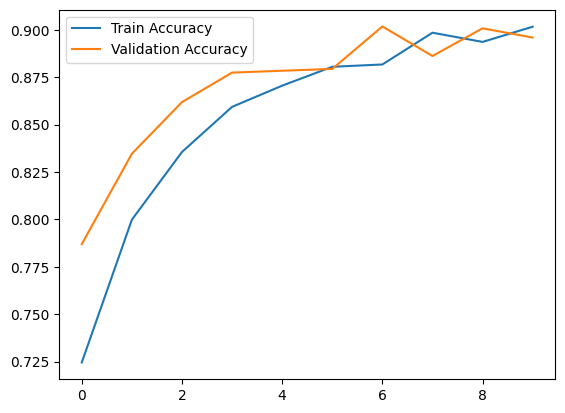

In [48]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [51]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_directory(
    'Data/test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")

Found 1288 images belonging to 3 classes.


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - accuracy: 0.8916 - loss: 0.2875
Test Accuracy: 0.91
Test Loss: 0.25


41/41 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step
              precision    recall  f1-score   support

     COVID19       0.96      0.84      0.90       116
      NORMAL       0.78      0.91      0.84       317
   PNEUMONIA       0.95      0.91      0.93       855

    accuracy                           0.91      1288
   macro avg       0.90      0.89      0.89      1288
weighted avg       0.91      0.91      0.91      1288



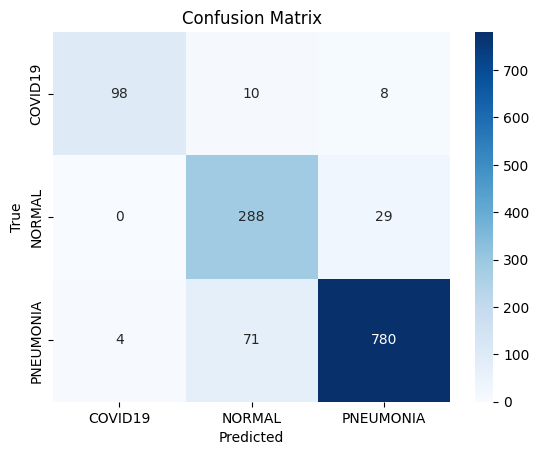

In [52]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()